В этой тетрадке лежит предобработка данных для дальнейшего построения на их основе модели в R

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d = pd.read_excel('datahw.xlsx')

###### Переименовываем колонки для удобства, удаляем ненужные, удаляем данные по странам, где есть дырки

In [3]:
d1 = d.rename(columns={"Logistics performance index: Overall (1=low to 5=high) [LP.LPI.OVRL.XQ]": "Logistics performance index: Overall",
                 "Labor force with advanced education (% of total working-age population with advanced education) [SL.TLF.ADVN.ZS]":"Labor force with advanced education, %",
                 "Age dependency ratio (% of working-age population) [SP.POP.DPND]":"Age dependency ratio (% of working-age population)",
                 "Gross capital formation (annual % growth) [NE.GDI.TOTL.KD.ZG]":"Gross capital formation (annual % growth)",
                 "Renewable internal freshwater resources per capita (cubic meters) [ER.H2O.INTR.PC]":"Renewable internal freshwater resources per capita, m3",
                 "Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]":"Total natural resources rents (% of GDP)",
                 "Government Effectiveness: Estimate [GE.EST]":"Government Effectiveness",
                 "Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]":"Political Stability and Absence of Violence/Terrorism",
                 "Regulatory Quality: Estimate [RQ.EST]":"Regulatory Quality",
                 "Rule of Law: Estimate [RL.EST]":"Rule of Law",
                 "Voice and Accountability: Estimate [VA.EST]":"Voice and Accountability",
                 "GNI per capita growth (annual %) [NY.GNP.PCAP.KD.ZG]":"GNI per capita growth (annual %)",
                 "Control of Corruption: Estimate [CC.EST]": "Control of Corruption",
                 "Дамми на отношение страны к группе стран с высоким доходом (ВНД на душу населения > $13205)": "Дамми на богатство"})


d1 = d1.drop(columns=['Country Code.1', 'Country Code', 'Custom_Time_Name', 'Custom_Time_Code',
                     'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Custom_Time_Name.1',
                     'Custom_Time_Code.1', 'Country Name.1', 'Country Code.2',
                     'GNI per capita (constant 2015 US$) [NY.GNP.PCAP.KD]'], axis=1)

d1.drop(d1.tail(5).index,inplace=True)

d1 = d1[d1 != '..']
d1 = d1.dropna()

###### Строим общий график с информацией о целевой переменной по странам

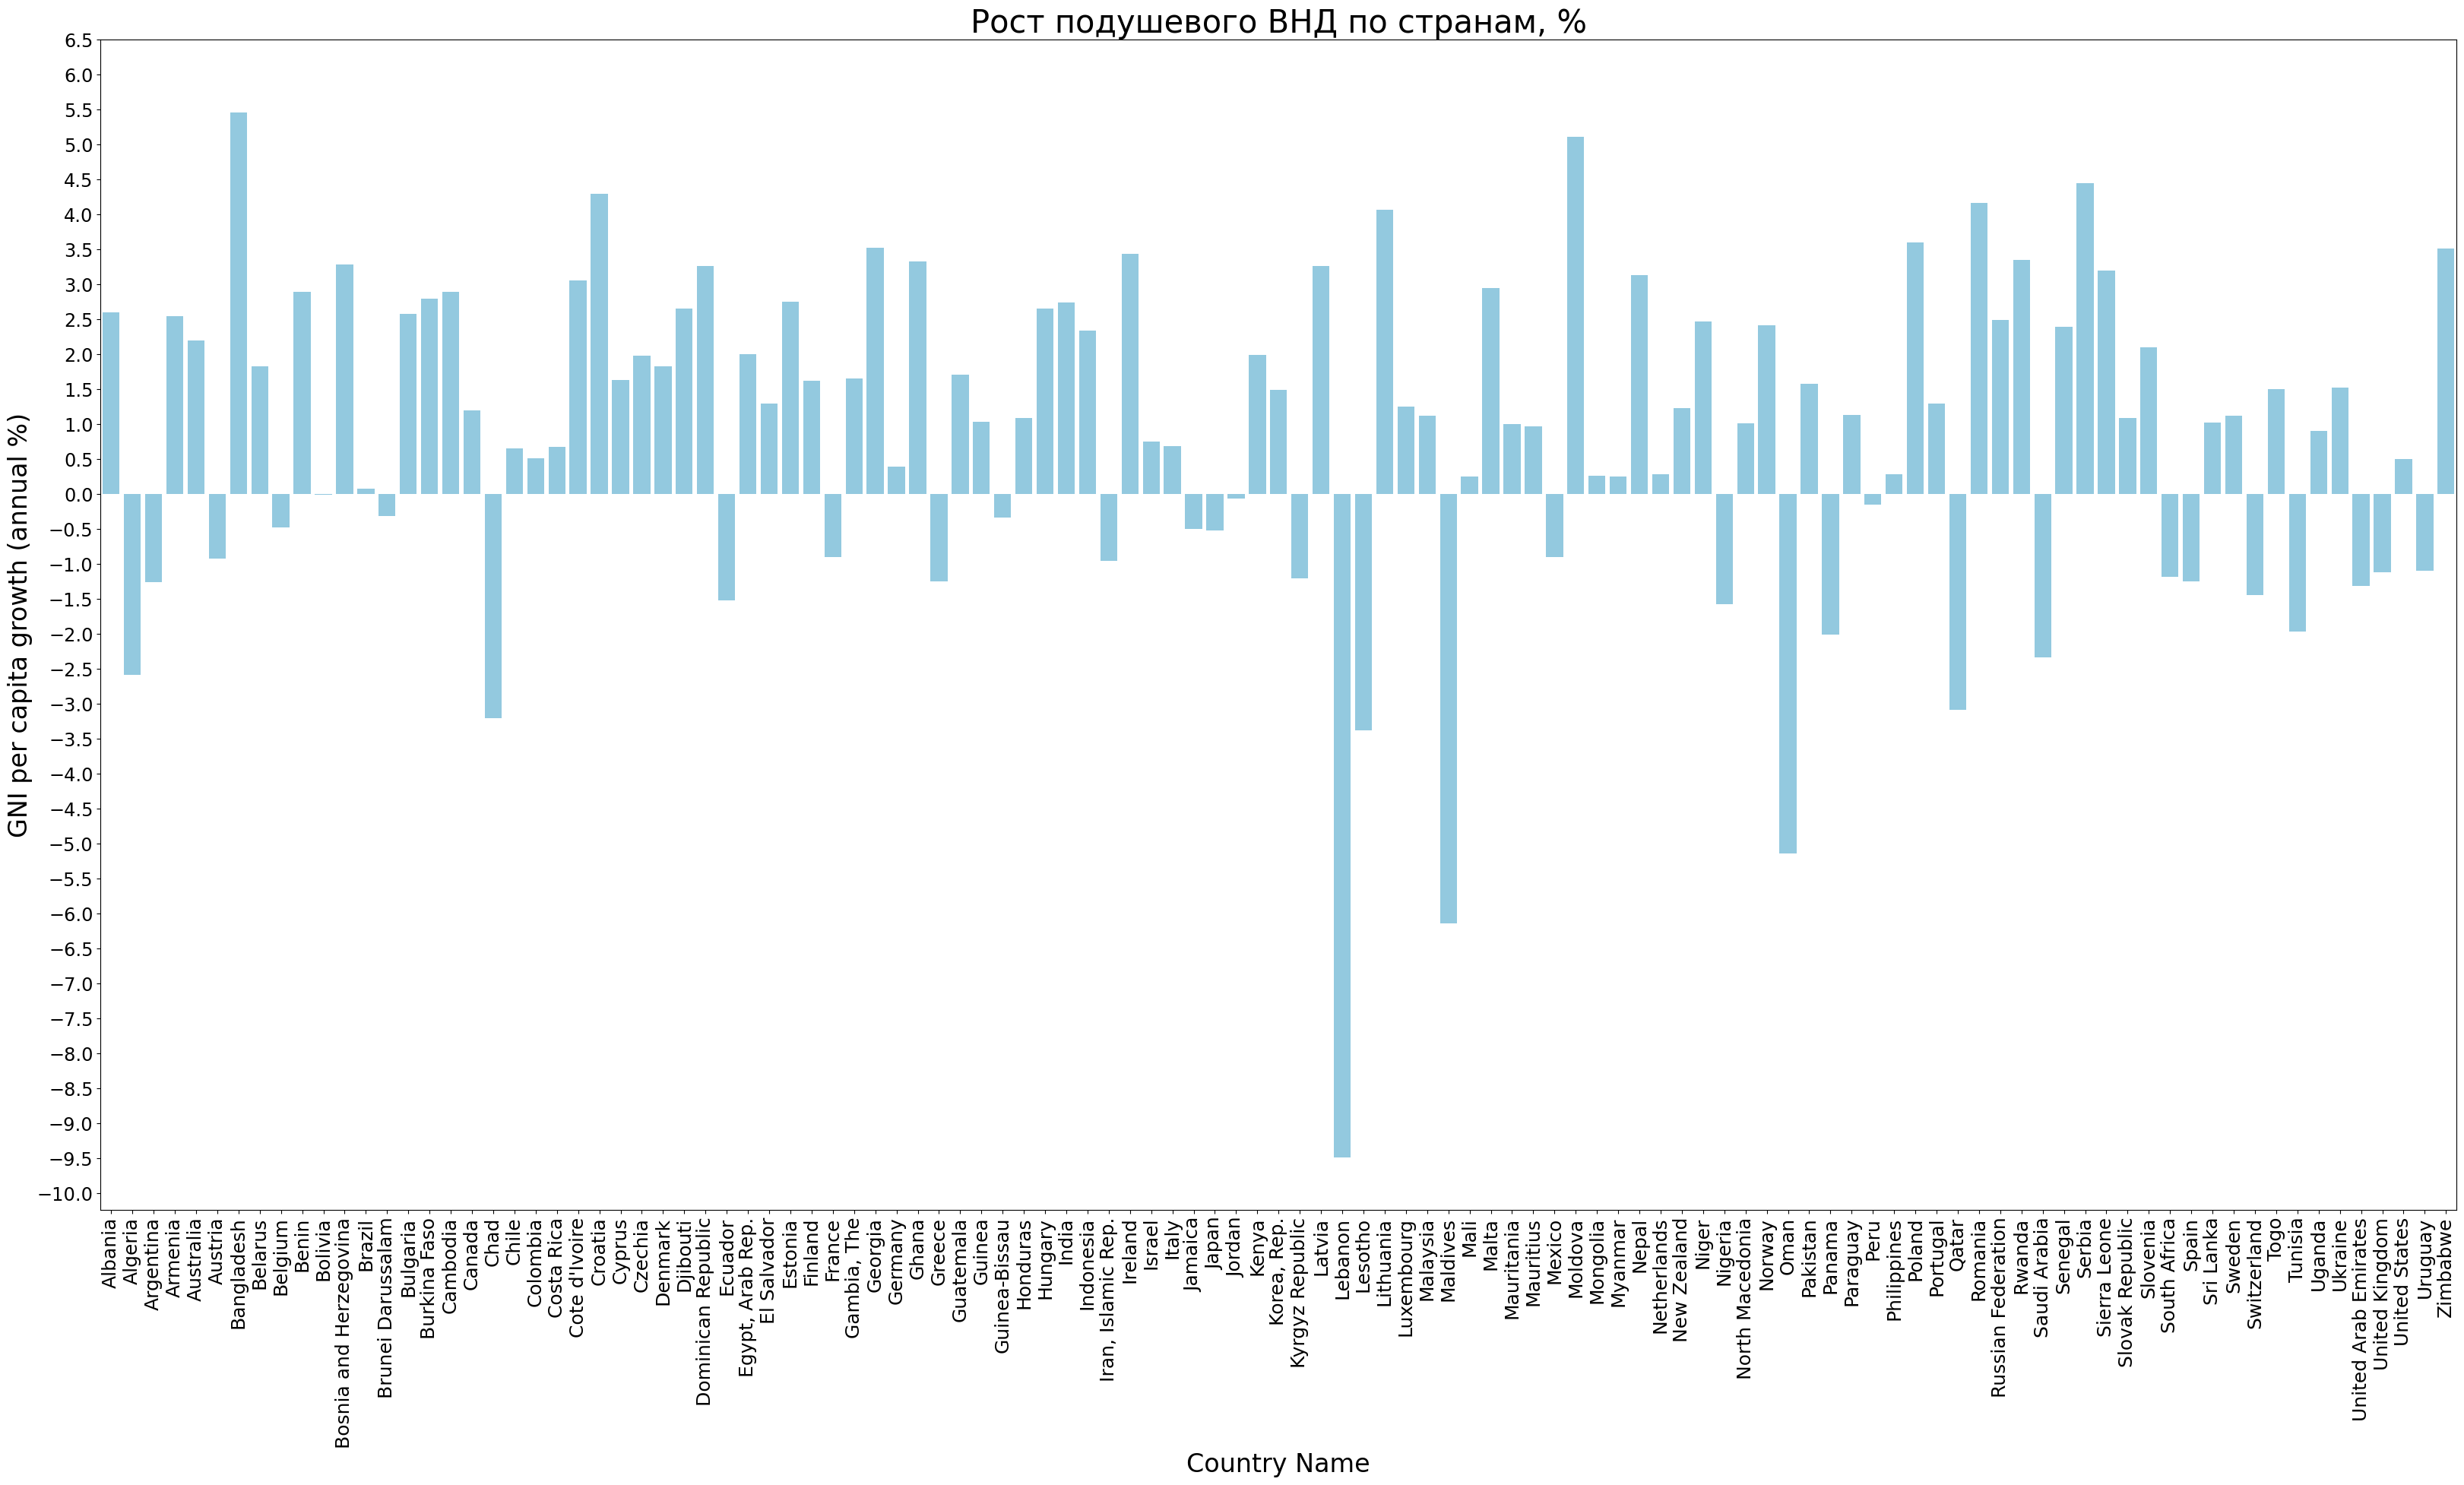

In [4]:
plt.figure(figsize=(40,20))
ax = sns.barplot(data=d1, x=d1['Country Name'], y=d1['GNI per capita growth (annual %)'], color='skyblue')
plt.xticks(rotation=90, fontsize=18)
plt.yticks(np.arange(-10, 7, step=0.5), fontsize='xx-large')
ax.set_xlabel('Country Name',fontsize=24)
ax.set_ylabel('GNI per capita growth (annual %)',fontsize=24)
ax.set_title('Рост подушевого ВНД по странам, %', fontsize=30) 

plt.savefig('Рост подушевого ВНД по странам.png', dpi=300, bbox_inches='tight')
plt.show()
#d1['GNI per capita growth (annual %)']


### Гипотеза: чем больше доля ренты от природных ресурсов в ВВП, тем выше рост ВНД

In [5]:
a=d1['Total natural resources rents (% of GDP)'].astype('int32')
b=d1['GNI per capita growth (annual %)'].astype('int32')
a.corr(b)
#по корреляции ничего нет, чекнуть значимость коэффициентов 
#(upd: нет, там в модели в R коэффициент отрицательный и значимый -> обратная зависимость -> гипотеза отвергается)

-0.3019352250316108

### Корреляционная матрица признаков

C:\Users\User\AppData\Local\Temp\ipykernel_4260\84981644.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), \


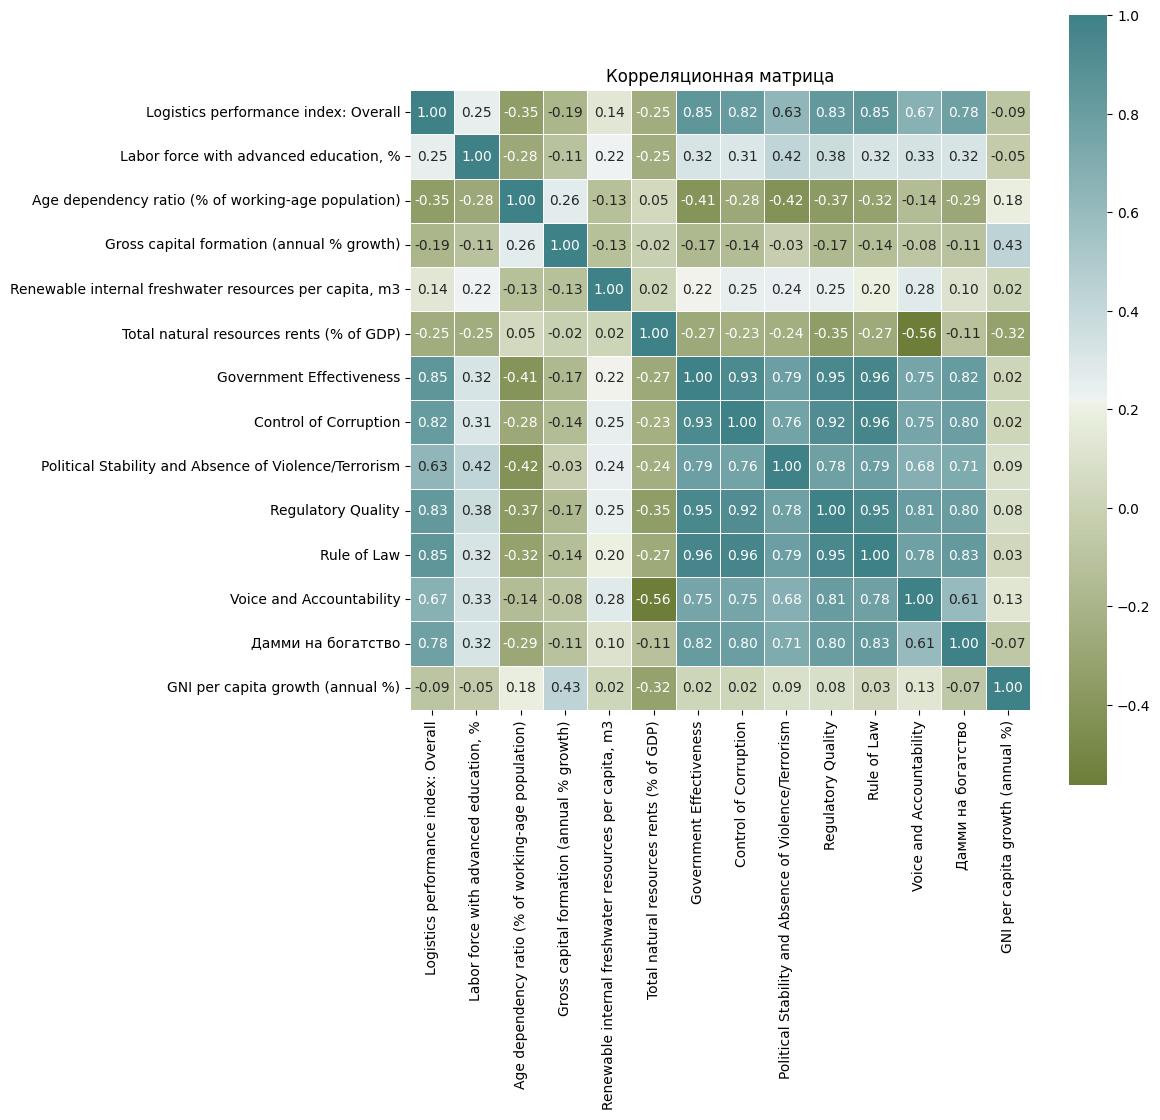

In [6]:
plt.figure(figsize=(10,10))
d_cor=d1.reset_index()
d_cor=d_cor.drop(columns=['Country Name','index'])
corr = d_cor.astype('float64').corr()
sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200, as_cmap=True), square=True)
plt.title('Корреляционная матрица')
plt.savefig('Корр матрица ДО.png', dpi=300, bbox_inches='tight')

#### Очень сильно коррелируют переменные *Government Effectiveness*, *Control of Corruption*, *Political Stability and Absence of Violence/Terrorism*, *Regulatory Quality*, *Rule of Law*, *Voice and Accountability*, поэтому принято решение убрать их из последующего анализа, так как они могут негативно повлиять на модель

C:\Users\User\AppData\Local\Temp\ipykernel_4260\2414242639.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), \


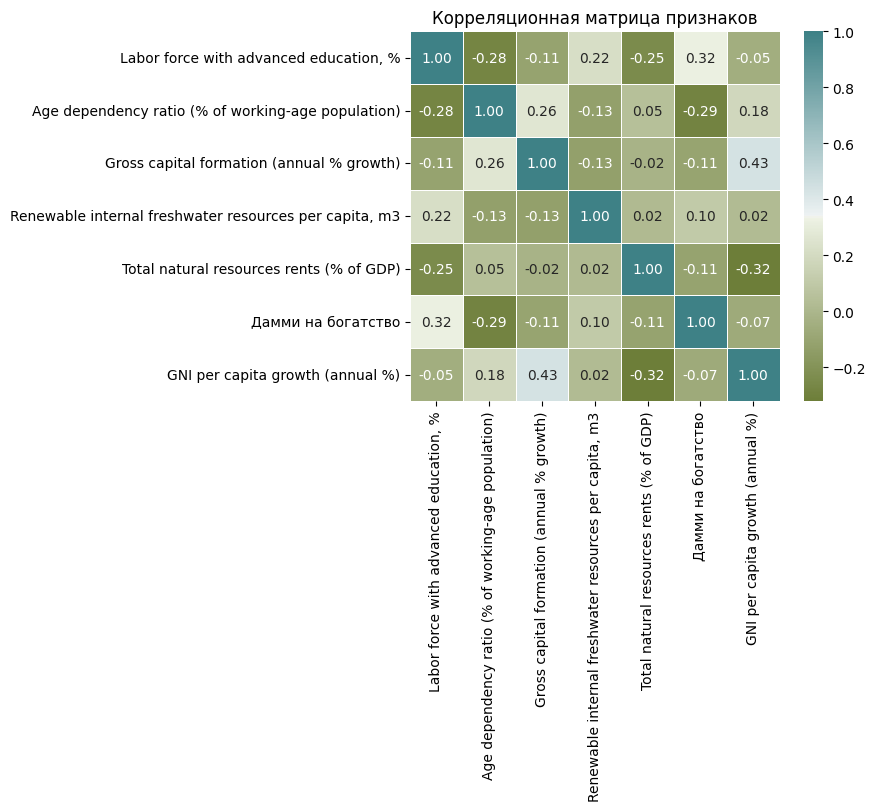

In [7]:
d_cor=d_cor.drop(columns=['Government Effectiveness',
                          'Control of Corruption',
                          'Political Stability and Absence of Violence/Terrorism',
                          'Regulatory Quality',
                          'Rule of Law','Voice and Accountability',
                          'Logistics performance index: Overall'])
corr = d_cor.astype('float64').corr()
sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200, as_cmap=True), square=True)
plt.title('Корреляционная матрица признаков')
plt.savefig('Корр матрица ПОСЛЕ.png', dpi=300, bbox_inches='tight')

###### Удаляем из итогового датасета коррелирующие переменные
###### Дополнительно удалияем Logistic performance index, так как сильно коррелирует с дамми, а дамми нам еще нужно (по условию)

In [8]:
d1=d1.drop(columns=['Government Effectiveness',
                    'Control of Corruption',
                    'Political Stability and Absence of Violence/Terrorism',
                    'Regulatory Quality',
                    'Rule of Law',
                    'Voice and Accountability',
                    'Logistics performance index: Overall'])

###### Гистограммы по нашим переменным

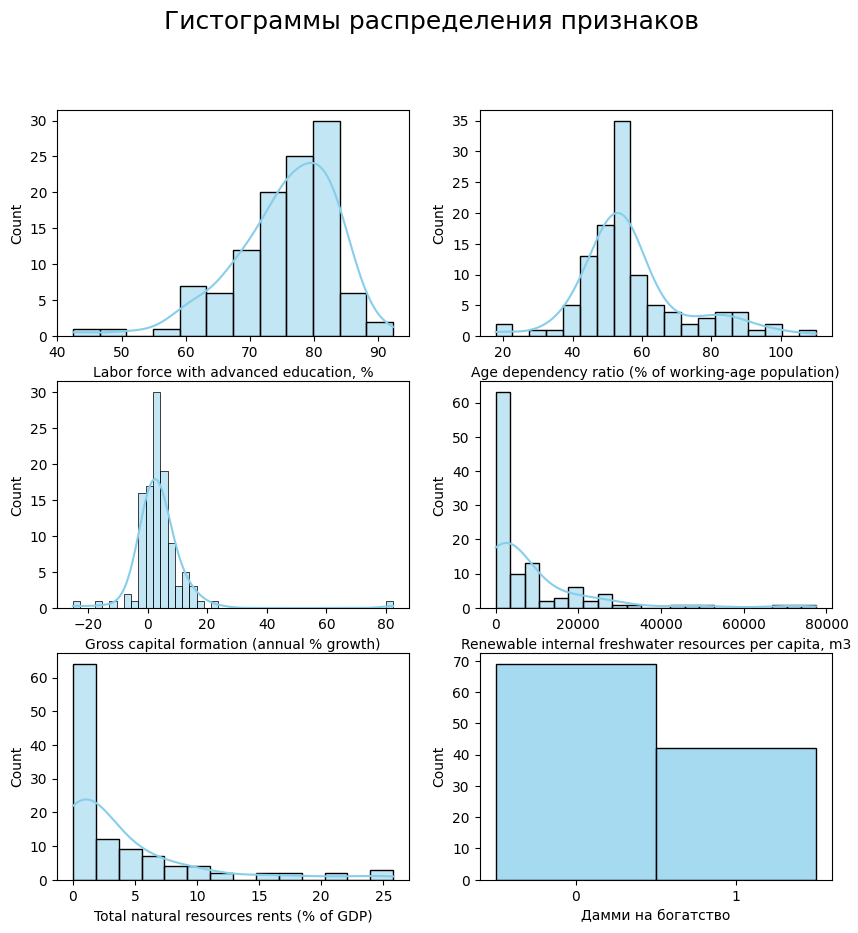

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
plt.suptitle('Гистограммы распределения признаков', fontsize=18)
sns.histplot(data=d1, x='Labor force with advanced education, %', kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=d1, x='Age dependency ratio (% of working-age population)', kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data=d1, x="Дамми на богатство", discrete=True, color='skyblue', ax=axs[2, 1])
plt.xticks(np.arange(0, 2, step=1))

sns.histplot(data=d1, x='Gross capital formation (annual % growth)', kde=True, color="skyblue", ax=axs[1, 0])
sns.histplot(data=d1, x='Renewable internal freshwater resources per capita, m3', kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=d1, x='Total natural resources rents (% of GDP)', kde=True, color="skyblue", ax=axs[2, 0])
plt.savefig('Гистограммы ПОСЛЕ.png', dpi=300, bbox_inches='tight')
plt.show()

###### Переименовываем переменные в короткие названия для удобной работы с моделью в R
###### И сохраняем в новый файл

In [10]:
d1.rename(columns = {'GNI per capita growth (annual %)':'gni', 
                    'Total natural resources rents (% of GDP)': 'tnrr',
                    'Renewable internal freshwater resources per capita, m3': 'rifs',
                    'Gross capital formation (annual % growth)': 'gcf',
                    'Labor force with advanced education, %': 'lfad',
                    'Age dependency ratio (% of working-age population)': 'adr',
                    'Дамми на богатство': 'dummy'}, inplace = True)
d1.to_excel("dataR.xlsx")